### Preguntas teóricas

1. ¿Para qué se usan break, continue y pass en python? 

Break: finaliza un bucle (loop), continuando con las sentencias que le siguen a éste. <br>
Continue: finaliza la iteación en la que se encuentre dentro del bucle, omite lo que le sigue dentro de ésta iteración y continúa a la siguiente. <br>
Pass: es una declaración nula, suele ser usada de forma momentánea en funciones y bucles vacíos. El programa no ignora esta declaración, pero no sucede nada cuando ésta se ejecuta. 

2. ¿Qué es una agregación de datos (Data Aggregation)?

Es una aplicación de agrupación a una o más columnas, permitiendo generar información para cada grupo (suma, recuento, media, etc).

3. ¿Qué son las variables locales y globales dentro de python? 

Las variables locales están declaradas dentro de una función, no puede ser llamada desde el espacio global (fuera de la función).
Las variables globales, están declaradas en el espacio global (entorno) y pueden ser llamadas dentro de distintas funciones dentro del mismo entorno. 

### Preguntas prácticas

Considere el dataset contenido en el link a continuación, el cual posee una muestra de salarios de trabajadores de Data Science a lo largo del mundo. 

https://www.kaggle.com/datasets/ruchi798/data-science-job-salaries?resource=download

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('ds_salaries.csv', index_col=0)

In [3]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


1. ¿Cuántos registros hay por año? 

In [4]:
df.work_year.value_counts()

2022    318
2021    217
2020     72
Name: work_year, dtype: int64

2. ¿Qué porcentaje representan los registros de cada año respecto al total de registros? 

In [5]:
round(df.work_year.value_counts()/len(df.work_year) * 100,1)

2022    52.4
2021    35.7
2020    11.9
Name: work_year, dtype: float64

3. ¿Qué tipo de título posee el mayor salario en USD de la muestra? 

In [6]:
df.job_title[df.salary_in_usd == df.salary_in_usd.max()].values

array(['Principal Data Engineer'], dtype=object)

4. Muestre la información asociada al mayor salario en USD, calculado en la pregunta anterior.

In [7]:
df.loc[df.salary_in_usd == df.salary_in_usd.max()]

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
252,2021,EX,FT,Principal Data Engineer,600000,USD,600000,US,100,US,L


In [8]:
#Opcion 2
df.job_title[df.salary_in_usd == df.salary_in_usd.max()].index
df.loc[252]

work_year                                2021
experience_level                           EX
employment_type                            FT
job_title             Principal Data Engineer
salary                                 600000
salary_currency                           USD
salary_in_usd                          600000
employee_residence                         US
remote_ratio                              100
company_location                           US
company_size                                L
Name: 252, dtype: object

5. Por cada nivel de experiencia, calcule el salario promedio en USD.

In [9]:
df[['experience_level','salary_in_usd']].groupby('experience_level').mean().sort_values('experience_level')

,salary_in_usd
experience_level,
EN,61643.318182
EX,199392.038462
MI,87996.056338
SE,138617.292857


6. Genere un gráfico con la cantidad de registros por año. 

<AxesSubplot:xlabel='work_year', ylabel='salary_in_usd'>

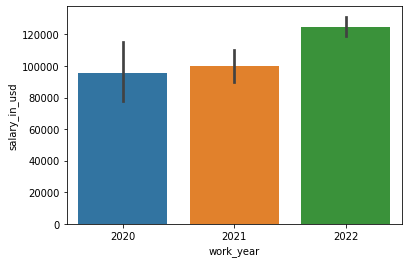

In [10]:
sns.barplot(x=df.work_year,y=df.salary_in_usd)

7. Muestre la distribución del saladio en USD. ¿Qué interpretaría de esta visualización? 

Text(0.5, 1.0, 'Distribución de los salarios en dólares')

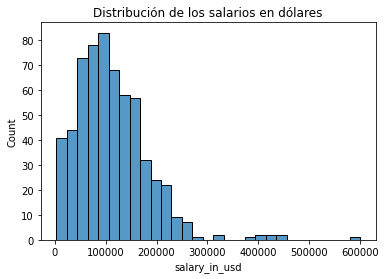

In [11]:
sns.histplot(df.salary_in_usd)
plt.title('Distribución de los salarios en dólares')

8. Elimine la columna "company_size".

In [12]:
df.drop('company_size', axis=1)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US
...,...,...,...,...,...,...,...,...,...,...
602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US
603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US
604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US
605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US
